In [1]:
import pandas as pd
import pyarrow as pa
import gzip as gz

HL7M machine data

In [4]:
df_ptsd_phi_vitals_sample003 = pd.read_feather(r"S:\Fackler_OSS_364376\data\IRB-364376-v1-230215\ptsd-phi\vitals-hl7m\003\1000000003-2016-07-07-0.0166667-1-HL7M.feather", columns=None, use_threads=True, storage_options=None)
df_ptsd_phi_vitals_sample003.columns

Index(['dts', 'AR1-D', 'AR1-M', 'AR1-R', 'AR1-S', 'CVP2', 'HR', 'NBP-D',
       'NBP-M', 'NBP-R', 'NBP-S', 'PVC', 'RR', 'SPO2-%', 'SPO2-R', 'ST-AVF',
       'ST-AVL', 'ST-AVR', 'ST-I', 'ST-II', 'ST-III', 'ST-V1', 'TP1-1',
       'TP1-2'],
      dtype='object')

In [7]:
df_ptsd_phi_vitals_sample003.isna().sum(axis=0)

dts         0
AR1-D      51
AR1-M      51
AR1-R      51
AR1-S      51
CVP2       99
HR         51
NBP-D     561
NBP-M     561
NBP-R     561
NBP-S     561
PVC        57
RR         52
SPO2-%     47
SPO2-R     48
ST-AVF    606
ST-AVL    606
ST-AVR    606
ST-I      606
ST-II     606
ST-III    606
ST-V1     606
TP1-1      49
TP1-2      51
dtype: int64

In [35]:
df_ptsd_phi_vitals_sample003.iloc[:,0].diff()
#also 60s 1 min intervals - decent tim resolution

0       NaN
1      60.0
2      60.0
3      60.0
4      60.0
       ... 
602    60.0
603    60.0
604    60.0
605    60.0
606    19.0
Name: dts, Length: 607, dtype: float64

GEVitals

In [8]:
df_ptsd_phi_vitals_sb_sample528 = pd.read_feather(r"S:\Fackler_OSS_364376\data\IRB-364376-v1-230215\ptsd-phi\vitals-sb\528\1000002528-2020-06-26-1-GEVITAL.feather", columns=None, use_threads=True, storage_options=None)
df_ptsd_phi_vitals_sb_sample528.columns

Index(['dts', 'PARM_HR', 'PARM_PVC', 'PARM_ST_SEG1', 'PARM_ST_SEG2',
       'PARM_ST_SEG3', 'PARM_ST_V1', 'PARM_ST_AVF', 'PARM_ST_AVL',
       'PARM_ST_AVR', 'PARM_SPO2_1', 'PARM_SPO2_HR1', 'PARM_NBP_CUFF',
       'PARM_RESP_RATE', 'PARM_NBP_SYS', 'PARM_NBP_MEAN', 'PARM_NBP_DIA',
       'GE_HSDI_SIGNAL_ID_NON_INVASIVE_PRESS_pulseRate_NUM'],
      dtype='object')

In [9]:
df_ptsd_phi_vitals_sb_sample528.isna().sum(axis=0)

dts                                                       0
PARM_HR                                                   0
PARM_PVC                                                  0
PARM_ST_SEG1                                              0
PARM_ST_SEG2                                              0
PARM_ST_SEG3                                              0
PARM_ST_V1                                              304
PARM_ST_AVF                                               0
PARM_ST_AVL                                               0
PARM_ST_AVR                                               0
PARM_SPO2_1                                              16
PARM_SPO2_HR1                                            17
PARM_NBP_CUFF                                         15136
PARM_RESP_RATE                                            0
PARM_NBP_SYS                                             69
PARM_NBP_MEAN                                            69
PARM_NBP_DIA                            

In [37]:
df_ptsd_phi_vitals_sb_sample528.iloc[:,0].diff()
#very large time interval ass resolution -DO NOT USE vitals_sb

0                NaN
1        4009.965088
2        1988.872070
3        2003.916016
4        1995.239990
            ...     
15305    2007.619873
15306    1989.240967
15307    2006.658203
15308    1994.155029
15309    2006.087891
Name: dts, Length: 15310, dtype: float64

TSBD

In [10]:
df_ptsd_phi_vitals_tsdb_sample052 = pd.read_feather(r"S:\Fackler_OSS_364376\data\IRB-364376-v1-230215\ptsd-phi\vitals-tsdb\052\1000002052-2019-02-05-1-TSDB.feather", columns=None, use_threads=True, storage_options=None)
df_ptsd_phi_vitals_tsdb_sample052.columns
#this is the one with HR, SpO2 and stuff


Index(['dts', 'HR', 'HR_Art_2930', 'HR_SpO2_7876', 'Temp', 'awRR_3495',
       'N2O_Insp_2885', 'N2O_Exp_2886', 'O2_Insp_2902', 'O2_Exp', 'Des_Insp',
       'Des_Exp_594', 'Sevo_Insp', 'Sevo_Exp_596', 'SpO2_7874', 'ECG_I_ST',
       'ECG_II_ST', 'ECG_III_ST', 'ECG_V5_ST', 'FIO2_2343', 'PIP_1227',
       'PEEP_1418', 'NIBP_S', 'ABP_S_2318', 'ABP_D_2319', 'ABP_M_2320',
       'CO2_Insp_perc', 'EtCO2_2905', 'NIBP_D', 'NIBP_M'],
      dtype='object')

In [12]:
out = df_ptsd_phi_vitals_tsdb_sample052.isna().sum(axis=0)

In [18]:
phys = 0
test = phys + out
test

dts                0
HR                15
HR_Art_2930       74
HR_SpO2_7876      12
Temp              89
awRR_3495          8
N2O_Insp_2885      2
N2O_Exp_2886       2
O2_Insp_2902       7
O2_Exp             7
Des_Insp         263
Des_Exp_594      263
Sevo_Insp        129
Sevo_Exp_596     129
SpO2_7874         12
ECG_I_ST          26
ECG_II_ST         26
ECG_III_ST        26
ECG_V5_ST         26
FIO2_2343          2
PIP_1227           2
PEEP_1418         20
NIBP_S           247
ABP_S_2318        74
ABP_D_2319        74
ABP_M_2320        74
CO2_Insp_perc      8
EtCO2_2905         7
NIBP_D           247
NIBP_M           245
dtype: int64

In [39]:
#1 min
ts = df_ptsd_phi_vitals_tsdb_sample052.iloc[:,0].diff()
ts

0       NaN
1      60.0
2      60.0
3      60.0
4      60.0
       ... 
296    60.0
297    60.0
298    60.0
299    60.0
300    60.0
Name: dts, Length: 301, dtype: float64

In [40]:
f = gz.open(r"S:\Fackler_OSS_364376\data\IRB-364376-v1-230215\EHR\dm_anesthesia.csv.gz")
f

<gzip _io.BufferedReader name='S:\\Fackler_OSS_364376\\data\\IRB-364376-v1-230215\\EHR\\dm_anesthesia.csv.gz' 0x28ba1b54b08>

In [41]:
#gets df columns from .csv.gz files
data = pd.read_csv(r"S:\Fackler_OSS_364376\data\IRB-364376-v1-230215\EHR\d_flo_measures.csv.gz", compression='gzip',
                   error_bad_lines=False)
#print(data)
list(data)
for i in data['disp_name'].unique():
    print(i)

#data['disp_name'].unique()
#data[data['flo_meas_name'] == 'SpO2']
#data[data['disp_name'] == 'SBS']

c:\Program Files\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Anaphylaxis
Autoimmune Disorder
Cytokine Release Syndrome
Serum Sickness
Immune System Disorders - Other, Specify
Infection and Infestation Adverse Events
Abdominal Infection
Anorectal Infection
Appendicitis
Appendicitis Perforated
Arteritis Infective
Bacteremia
Biliary Tract Infection
Bladder Infection
Bone Infection
Breast Infection
Bronchial Infection
Catheter Related Infection
Cecal Infection
Cervicitis Infection
Conjunctivitis
Conjunctivitis Infection
Corneal Infection
Cranial Nerve Infection
Cytomegalovirus Infection Reactivation
Device Related Infection
Duodenal Infection
Encephalitis Infection
Encephalomyelitis Infection
Endocarditis Infective
Endophthalmitis
Enterocolitis Infectious
Epstein-Barr Virus Infection Reactivation
Esophageal Infection
Eye Infection
Folliculitis
Fungemia
Gallbladder Infection
Gum Infection
Hepatic Infection
Hepatitis B Reactivation
Hepatitis Viral
Herpes Simplex Reactivation
Infective Myositis
Joint Infection
Kidney Infection
Laryngitis
Lip Infection


In [42]:
#output for sbs dictionary key that was talked about in meeting
data[data['disp_name'] == 'State Behavioral Scale'].iloc[1]

flo_meas_id                                    1570400709
flo_meas_name           R BH STATE BEHAVIORAL SCALE (SBS)
site_row_id                                           NaN
record_state_c                                        NaN
allow_comp_yn                                         1.0
disp_name                          State Behavioral Scale
abbr_p                                                NaN
row_typ_c                                             1.0
chg_trg_type_c                                        NaN
val_type_c                                            8.0
cpy_fwd_yn                                            NaN
units                                                 NaN
multi_sel_yn                                          0.0
intake_typ_c                                          NaN
output_typ_c                                          NaN
duplicateable_yn                                      0.0
after_file_lpp_id                                     NaN
cat_ini       

In [43]:
#
import pickle5 as pickle
obj = pd.read_pickle(r"S:\Fackler_OSS_364376\data\IRB-364376-v1-230215\EHR\dm_anesthesia-dtypes.pkl")

ValueError: unsupported pickle protocol: 5

In [ ]:
list(df_ptsd_phi_vitals_tsdb_sample052)

['dts',
 'HR',
 'HR_Art_2930',
 'HR_SpO2_7876',
 'Temp',
 'awRR_3495',
 'N2O_Insp_2885',
 'N2O_Exp_2886',
 'O2_Insp_2902',
 'O2_Exp',
 'Des_Insp',
 'Des_Exp_594',
 'Sevo_Insp',
 'Sevo_Exp_596',
 'SpO2_7874',
 'ECG_I_ST',
 'ECG_II_ST',
 'ECG_III_ST',
 'ECG_V5_ST',
 'FIO2_2343',
 'PIP_1227',
 'PEEP_1418',
 'NIBP_S',
 'ABP_S_2318',
 'ABP_D_2319',
 'ABP_M_2320',
 'CO2_Insp_perc',
 'EtCO2_2905',
 'NIBP_D',
 'NIBP_M']

In [ ]:
list(df_ptsd_phi_vitals_sb_sample528) # bad time resolution & least parameters

['dts',
 'PARM_HR',
 'PARM_PVC',
 'PARM_ST_SEG1',
 'PARM_ST_SEG2',
 'PARM_ST_SEG3',
 'PARM_ST_V1',
 'PARM_ST_AVF',
 'PARM_ST_AVL',
 'PARM_ST_AVR',
 'PARM_SPO2_1',
 'PARM_SPO2_HR1',
 'PARM_NBP_CUFF',
 'PARM_RESP_RATE',
 'PARM_NBP_SYS',
 'PARM_NBP_MEAN',
 'PARM_NBP_DIA',
 'GE_HSDI_SIGNAL_ID_NON_INVASIVE_PRESS_pulseRate_NUM']

In [ ]:
list(df_ptsd_phi_vitals_sample003)

['dts',
 'AR1-D',
 'AR1-M',
 'AR1-R',
 'AR1-S',
 'CVP2',
 'HR',
 'NBP-D',
 'NBP-M',
 'NBP-R',
 'NBP-S',
 'PVC',
 'RR',
 'SPO2-%',
 'SPO2-R',
 'ST-AVF',
 'ST-AVL',
 'ST-AVR',
 'ST-I',
 'ST-II',
 'ST-III',
 'ST-V1',
 'TP1-1',
 'TP1-2']

In [44]:
#ultimately turn into a function
#if each reading is at 1 miin, then 120 readings is 2 hours 
# use % 120 to find remaining data set until end of interval
# use /120 cast to int to get home many in loop
#take the corresponding rows
data = df_ptsd_phi_vitals_sample003
rows = df_ptsd_phi_vitals_sample003.shape[0]
#data.iloc[(0*120):((0*120)+120),:]
#interval = []*data.shape
t_intervals = {}
#number of time intervals
for i in range(int(rows/120)):
    t_intervals['t_2hr_'+str(i)] = data.iloc[(i*120):((i*120)+120),:]
     #i*120 --> (i*120)+119
#remainder
for i in range(int(rows/120)*120, rows):
    t_intervals['t_2hr_'+str(int(rows/120))] = data.iloc[(int(rows/120)*120):rows,:]
     #end of even cutoffs --> end of df
t_intervals['t_2hr_5']
#int(rows/120)








,dts,AR1-D,AR1-M,AR1-R,AR1-S,CVP2,HR,NBP-D,NBP-M,NBP-R,...,SPO2-R,ST-AVF,ST-AVL,ST-AVR,ST-I,ST-II,ST-III,ST-V1,TP1-1,TP1-2
600,85980.0,44.0,54.0,156.0,60.0,6.0,136.0,NaN,NaN,NaN,...,136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,31.6
601,86040.0,46.0,54.0,154.0,62.0,7.0,136.0,NaN,NaN,NaN,...,138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,31.6
602,86100.0,46.0,54.0,156.0,62.0,7.0,136.0,NaN,NaN,NaN,...,136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,31.8
603,86160.0,48.0,56.0,154.0,64.0,10.0,140.0,NaN,NaN,NaN,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,31.8
604,86220.0,46.0,56.0,146.0,64.0,9.0,140.0,NaN,NaN,NaN,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,31.8
605,86280.0,46.0,54.0,146.0,64.0,8.0,138.0,NaN,NaN,NaN,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,31.8
606,86299.0,NaN,NaN,NaN,NaN,NaN,NaN,41.0,51.0,135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'HR (bpm)')

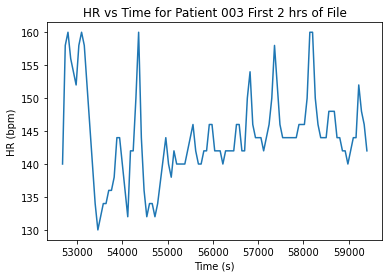

In [45]:
#SEABORN: HR trace for patient over first 2 hr interval -  USE THIS CODE GOING FORWARD!
import seaborn as sns
fig1 = sns.lineplot(data=t_intervals['t_2hr_0'], x = 'dts', y = 'HR')
fig1.set_title("HR vs Time for Patient 003 First 2 hrs of File")
fig1.set_xlabel("Time (s)")
fig1.set_ylabel("HR (bpm)")
#HR is in bpm and dts is in 60s intervals for first 2 hours of file


Text(0, 0.5, 'HR (bpm)')

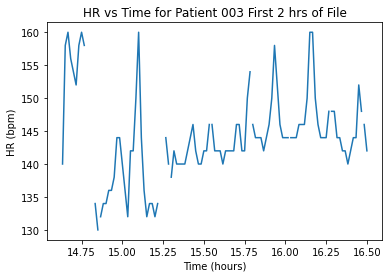

In [ ]:
#MATPLOTLIB: HR trace for patient over first 2 hr interval
# doesnt interpolate data but easy to convert to hoursS
import matplotlib.pyplot as plt
data_t_int_1 = t_intervals['t_2hr_0']
x = data_t_int_1['dts']/3600
y = data_t_int_1['HR']
#data_t_int_1['dts']
plt.plot(x,y)
plt.title("HR vs Time for Patient 003 First 2 hrs of File")
plt.xlabel("Time (hours)")
plt.ylabel("HR (bpm)")
#HR is in bpm and dts is in 60s intervals for first 2 hours of file

In [3]:
df_ge = pd.read_feather(r"S:\Fackler_OSS_364376\data\IRB-364376-v1-230215\ptsd-phi\vitals-sb\917\1000002917-2021-11-23-1-GEVITAL.feather", columns=None, use_threads=True, storage_options=None)
df_ge

,dts,PARM_HR,PARM_PVC,PARM_ST_SEG1,PARM_ST_SEG2,PARM_ST_SEG3,PARM_ST_V1,PARM_ST_V2,PARM_ST_V3,PARM_ST_V4,...,GE_HSDI_SIGNAL_ID_MON_GAS_RESPIRED_FRAC_INSP_O2_CONC_NUM,GE_HSDI_SIGNAL_ID_MON_GAS_RESPIRED_FRAC_INSP_CO2_CONC_NUM,GE_HSDI_SIGNAL_ID_MON_GAS_RESPIRED_FRAC_EXPIRED_O2_CONC_NUM,GE_HSDI_SIGNAL_ID_MON_GAS_RESPIRED_FRAC_EXPIRED_CO2_CONC_NUM,GE_HSDI_SIGNAL_ID_RESPIRATION_ambientPressure_NUM,GE_HSDI_SIGNAL_ID_RESPIRATION_respRate_NUM,PARM_NBP_SYS,PARM_NBP_MEAN,PARM_NBP_DIA,GE_HSDI_SIGNAL_ID_NON_INVASIVE_PRESS_pulseRate_NUM
0,1.567206e+03,130.0,0.0,1.5,1.4,0.0,-1.7,0.7,2.1,1.4,...,99.000000,0.0,94.599998,32.0,758.0,29.0,NaN,NaN,NaN,NaN
1,3.568753e+03,130.0,0.0,1.5,1.4,0.0,-1.7,0.7,2.1,1.4,...,99.000000,0.0,94.300003,34.0,758.0,29.0,NaN,NaN,NaN,NaN
2,5.569810e+03,130.0,0.0,1.5,1.4,0.0,-1.6,0.8,2.0,1.2,...,99.000000,0.0,94.400002,33.0,758.0,29.0,NaN,NaN,NaN,NaN
3,7.570693e+03,130.0,0.0,1.5,1.4,0.0,-1.6,0.8,2.0,1.2,...,99.099998,0.0,94.500000,33.0,758.0,29.0,NaN,NaN,NaN,NaN
4,9.572978e+03,130.0,0.0,1.6,1.5,-0.1,-1.6,0.9,2.2,1.3,...,99.000000,0.0,94.300003,34.0,758.0,29.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43195,8.639116e+07,122.0,0.0,2.8,3.5,0.4,-3.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43196,8.639316e+07,122.0,0.0,2.8,3.5,0.4,-3.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43197,8.639516e+07,122.0,0.0,3.2,4.1,0.8,-4.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43198,8.639715e+07,122.0,0.0,3.2,4.1,0.8,-4.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_ge['PARM_RESP_RATE']
df_ge['dts'].diff()

0                NaN
1        2001.547119
2        2001.056885
3        2000.883057
4        2002.284912
            ...     
43195    2003.672852
43196    2000.423096
43197    2002.987061
43198    1986.359863
43199    2000.568115
Name: dts, Length: 43200, dtype: float64

In [5]:
df_mb = pd.read_feather(r"S:\Fackler_OSS_364376\data\IRB-364376-v1-230215\ptsd-phi\vitals-sb\917\1000002917-2021-11-23-1-MEDIBUSVITAL.feather", columns=None, use_threads=True, storage_options=None)
df_mb

,dts,MEDBUS_DATA_EXPIRATORY_MINUTE_VOLUME_MVE,MEDBUS_M_INSP_MV,MEDBUS_DATA_COMPLIANCE_CDYN,MEDBUS_DATA_RESISTANCE_R,MEDBUS_M_SPON_EXP_MV,MEDBUS_M_PATIENT_AIRWAY_RESIS,MEDBUS_M_MAND_EXP_MV,MEDBUS_M_AVE_DEVICE_FLOW,MEDBUS_DATA_VT_MAND,...,MEDBUS_TXT_VENT_SUCTION_MAN_ACTIVE,MEDBUS_TXT_VENT_SYNC_INT_VENT_MODE,MEDBUS_TXT_VENT_MODE_SPN_CPAP,MEDBUS_DATA_RAPID_SHALLOW_BREATHING_INDEX,MEDBUS_DEVICE_SETTINGS_SC_BODY_WEIGHT,MEDBUS_DEVICE_SETTINGS_SC_START_OF_NIGHT_REST,MEDBUS_DEVICE_SETTINGS_SC_END_OF_NIGHT_REST,MEDBUS_DEVICE_SETTINGS_SC_UPPER_LIM_INSP_O2_FIO2_MAX,MEDBUS_DEVICE_SETTINGS_SC_UPPER_LIM_PEEP_MAX,MEDBUS_DEVICE_SETTINGS_SC_BODY_HEIGHT
0,5.202432e+02,2.03,3.09,6.6,45.599998,0.01,41.200001,2.03,6.6,0.079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.270403e+03,2.06,3.14,27.0,45.599998,0.00,41.200001,2.06,6.7,0.100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.975055e+03,2.08,3.17,5.1,45.599998,0.00,41.200001,2.07,6.7,0.075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.694823e+03,2.11,3.21,5.9,42.500000,0.00,38.200001,2.10,6.6,0.080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.445679e+03,2.12,3.23,9.2,42.500000,0.00,38.200001,2.12,6.6,0.102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26668,4.638062e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,15.1,22.0,6.0,40.0,5.0,97.0
26669,4.638223e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,15.1,22.0,6.0,40.0,5.0,97.0
26670,4.638381e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,15.1,22.0,6.0,40.0,5.0,97.0
26671,4.638544e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,15.1,22.0,6.0,40.0,5.0,97.0


In [9]:
df_mb['MEDBUS_DATA_RESPIRATORY_RATE']
df_mb['dts'].diff()

0                NaN
1        1750.159912
2        1704.652100
3        1719.767822
4        1750.856201
            ...     
26668    1656.884766
26669    1610.859131
26670    1579.149902
26671    1626.158203
26672    1549.826904
Name: dts, Length: 26673, dtype: float64

Text(0, 0.5, 'RR (bpm)')

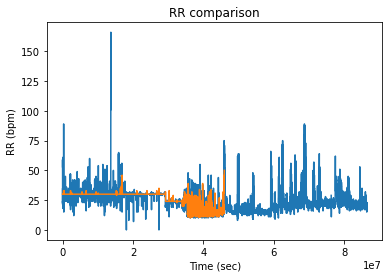

In [14]:
import matplotlib.pyplot as plt
x_ge = df_ge['dts']
y_ge = df_ge['PARM_RESP_RATE']
x_mb = df_mb['dts']
y_mb = df_mb['MEDBUS_DATA_RESPIRATORY_RATE']

plt.plot(x_ge,y_ge)
plt.plot(x_mb, y_mb)
plt.title("RR comparison")
plt.xlabel("Time (sec)")
plt.ylabel("RR (bpm)")

Check NA ratio

In [2]:
from pathlib import Path
import numpy as np

In [3]:
dir = Path(r"S:\Fackler_OSS_364376\data\IRB-364376-v1-230215")

# fp = dir.joinpath('EHR', 'd_flo_measures.csv.gz')
# dict = pd.read_csv(fp, compression="gzip")

# names = ["State Behavioral Scale",
# "-3 Unresponsive", 
# "-2 Responsive to noxious stimuli", 
# "-1 Responsive to gentle touch or voice",
# "0 Awake and Able to calm",
# "+1 Restless and difficult to calm",
# "+2 Agitated",
# "State Behavioral Scale (SBS)"]

fmid = [304080016, 304080017, 304080018, 304080019, 304080020, 304080021]

# connect with feather file
fp = dir.joinpath('EHR', 'ptsd_record.csv.gz')

ptsd_record = pd.read_csv(fp, compression="gzip")

# load flow table of all patient EHR records
fp = dir.joinpath('EHR', 'flowsheet.csv.gz')
data = pd.read_csv(fp, compression="gzip")
data = data.drop(columns = ['meas_comment', 'meas_template_id'])
# Note: pandas took 50 seconds to load the table. Consider porting to PySpark RDD

sbs = data[data['meas_id'].isin(fmid)]
# print(sbs.shape)
# 25878 entries

# calculate sbs score from offset
sbs['SBS'] = sbs['meas_id'] - 304080019
sbs = sbs.drop(columns=['meas_value', 'meas_id'])
sbs['recorded_time'] = pd.to_datetime(sbs['recorded_time'], format='%Y-%m-%d %H:%M:%S')
sbs_indiv = sbs.groupby('pat_enc_csn_sid')

# load pre-selected patients from patient_inclexcl.ipynb
patients = np.load('./DONOTPUSH/patients_wodrugs.npy', allow_pickle=True)

C:\Users\fhuang15\AppData\Local\Temp\ipykernel_17384\1897269671.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbs['SBS'] = sbs['meas_id'] - 304080019


In [36]:
pd.options.mode.chained_assignment = None  # default='warn'

import json

with open('na_ge.txt') as f:
    data = f.read()
ge_na = json.loads(data)
ge_na = dict.fromkeys(ge_na, 0)

with open('na_hl7m.txt') as f:
    data = f.read()
hl7m_na = json.loads(data)
hl7m_na = dict.fromkeys(hl7m_na, 0)

with open('na_tsdb.txt') as f:
    data = f.read()
tsdb_na = json.loads(data)
tsdb_na = dict.fromkeys(tsdb_na, 0)

ctr = 1

for p in patients:
    files = ptsd_record[ptsd_record['pat_enc_csn_sid'] == p]
    devices = files['device']
    filename = files['filename'] + '.feather'

    for (d, fn) in zip(devices, filename): 
        # drop 'MEDIBUSVITAL' since it is a ventilator (we dont want ventilated patients)
        if fn.endswith('MEDIBUSVITAL.feather'):
            continue

        # HL7M', 'TSDB', 'GEVITAL'
        if (d.endswith('HL7M') or d.endswith('TSDB')):
            fp_device = 'vitals-' + d.lower()
        else:
            fp_device = 'vitals-sb'
        fp_p = str(p)[-3:] # last 3 digit of pat_enc_csn_sid is the subfolder
        fp = dir.joinpath('ptsd-phi', fp_device, fp_p, fn)
        if (fp == None):
            print(fp, "does not exist")
            continue

        df = pd.read_feather(fp, columns=None, use_threads=True, storage_options=None)
        na_count = df.isna().sum(axis=0)
        
        for col in df.columns:
            if d.endswith('HL7M'):
                if col not in hl7m_na:
                    hl7m_na[col] = 0
                hl7m_na[col] += df[col].notnull().sum()
            elif d.endswith('TSDB'):
                if col not in tsdb_na:
                    tsdb_na[col] = 0
                tsdb_na[col] += df[col].notnull().sum()
            elif d.endswith('GEVITAL'):
                if col not in ge_na:
                    ge_na[col] = 0
                ge_na[col] += df[col].notnull().sum()

    if not ctr % 20:
        print(f'[{ctr} / {len(patients)}]: {p}')

    ctr += 1

[20 / 415]: 1000000025
[40 / 415]: 1000002164
[60 / 415]: 1000002192
[80 / 415]: 1000002218
[100 / 415]: 1000002256
[120 / 415]: 1000002286
[140 / 415]: 1000002324
[160 / 415]: 1000002361
[180 / 415]: 1000002396
[200 / 415]: 1000002435
[220 / 415]: 1000002466
[240 / 415]: 1000002516
[260 / 415]: 1000002551
[280 / 415]: 1000002583
[300 / 415]: 1000002633
[320 / 415]: 1000002671
[340 / 415]: 1000002705
[360 / 415]: 1000002751
[380 / 415]: 1000002787
[400 / 415]: 1000002827


In [37]:
ge_na

{'dts': 26080032,
 'PARM_HR': 25630129,
 'PARM_PVC': 25543772,
 'PARM_ST_SEG1': 24049062,
 'PARM_ST_SEG2': 24383329,
 'PARM_ST_SEG3': 23911521,
 'PARM_ST_V1': 23464177,
 'PARM_ST_AVF': 23734950,
 'PARM_ST_AVL': 23734918,
 'PARM_ST_AVR': 23734950,
 'PARM_SPO2_1': 25095977,
 'PARM_SPO2_HR1': 25086002,
 'PARM_NBP_SYS': 19414309,
 'PARM_NBP_MEAN': 19414309,
 'PARM_NBP_DIA': 19414309,
 'PARM_NBP_CUFF': 267828,
 'PARM_RESP_RATE': 24971704,
 'GE_HSDI_SIGNAL_ID_NON_INVASIVE_PRESS_pulseRate_NUM': 0,
 'PARM_ST_V2': 1724761,
 'PARM_ST_V3': 1736621,
 'PARM_ST_V4': 1721199,
 'PARM_ST_V5': 1712155,
 'PARM_ST_V6': 1680852,
 'PARM_ABP1_S': 4760068,
 'PARM_ABP1_M': 4797179,
 'PARM_ABP1_D': 4760293,
 'PARM_ABP1_HR': 4762014,
 'PARM_CVP2': 2079428,
 'PARM_ABP2_S': 899451,
 'PARM_ABP2_M': 904616,
 'PARM_ABP2_D': 899470,
 'PARM_ABP2_HR': 899427,
 'PARM_PULM2_S': 3175,
 'PARM_PULM2_M': 3192,
 'PARM_PULM2_D': 3183,
 'GE_HSDI_SIGNAL_ID_MON_GAS_RESPIRED_FRAC_INSP_O2_CONC_NUM': 2208219,
 'GE_HSDI_SIGNAL_ID_MON_

In [38]:
json.loads(ge_na.to_json())

AttributeError: 'dict' object has no attribute 'to_json'